/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_34614/3978686773.py:14: RuntimeWarning: divide by zero encountered in log2
  H = -np.sum(p * np.log2(p))
/var/folders/wj/11sgsjxd7x75l9tkc6r2l1p80000gn/T/ipykernel_34614/3978686773.py:14: RuntimeWarning: invalid value encountered in multiply
  H = -np.sum(p * np.log2(p))


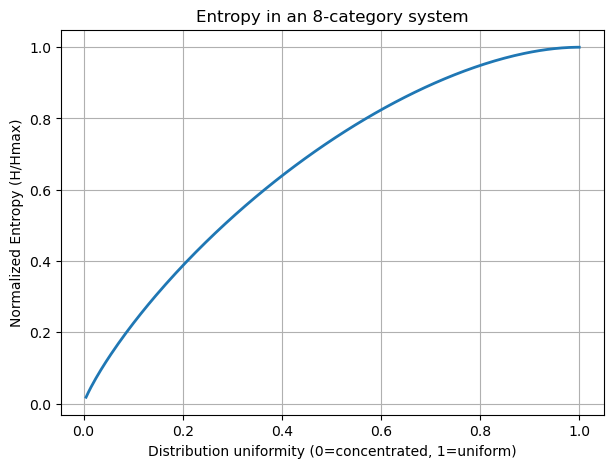

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of categories
k = 8

# Define concentration: from "all mass in one category" to "uniform distribution"
alpha = np.linspace(0, 1, 200)  # 0 = max concentration, 1 = uniform

entropies = []
for a in alpha:
    # Distribution: first category gets (1-a + a/k), rest share a/k
    p = np.array([1 - a + a/k] + [a/k] * (k-1))
    H = -np.sum(p * np.log2(p))
    entropies.append(H)

# Normalize entropy to [0,1] by dividing by log2(k)
entropies = np.array(entropies) / np.log2(k)

# Plot
plt.figure(figsize=(7,5))
plt.plot(alpha, entropies, lw=2)
plt.xlabel("Distribution uniformity (0=concentrated, 1=uniform)")
plt.ylabel("Normalized Entropy (H/Hmax)")
plt.title("Entropy in an 8-category system")
plt.grid(True)
plt.show()


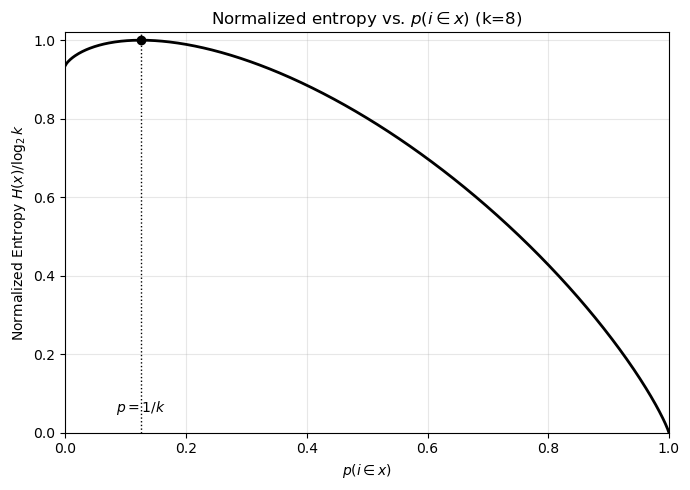

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
k = 8                  # number of categories
n_points = 500
p_i = np.linspace(0, 1, n_points)  # x-axis: p(i ∈ x)

# Build distributions: focal category i has probability p_i; remaining mass is spread equally across others
p_rest = (1 - p_i) / (k - 1)
P = np.column_stack([p_i] + [p_rest] * (k - 1))

# Entropy (bits) with safe handling for 0*log(0)=0
with np.errstate(divide='ignore', invalid='ignore'):
    H_bits = -np.nansum(np.where(P > 0, P * np.log2(P), 0.0), axis=1)

# Normalized entropy (0..1)
H_norm = H_bits / np.log2(k)

# --- Single panel: normalized H(x) vs p(i ∈ x) ---
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(p_i, H_norm, color='black', linewidth=2)
ax.set_xlabel(r"$p(i \in x)$")
ax.set_ylabel(r"Normalized Entropy $H(x)/\log_2 k$")
ax.set_title(f"Normalized entropy vs. $p(i \\in x)$ (k={k})")
ax.set_xlim(0, 1); ax.set_ylim(0, 1.02)
ax.grid(True, alpha=0.3)

# Mark maximum at p_i = 1/k
ax.axvline(1/k, color='black', linestyle=':', linewidth=1)
ax.plot([1/k], [1.0], marker='o', color='black')
ax.text(1/k, 0.04, r"$p=1/k$", ha='center', va='bottom')

plt.tight_layout()
plt.savefig("/Volumes/TwoTeras/Entropy_Paper/Raw_Entropy_Figures/Fig_3.png", dpi=300)
